# Домашнее задание №3 - Линейная регрессия для предсказания продолжительности жизни

В этой части домашки вам нужно сделать вашу первую полноценную **модель машинного обучения**!

Для этого мы возьмем датасет по **продолжительности жизни** и попробуем построить по нему **линейную регрессию**. Будем стараться выделить наиболее **важные для продолжительности жизни признаки**, а также постараемся сделать нашу модель **устойчивой** к новым данным - то есть избежать **переобучения**.

Описание датасета можно найти [тут](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Часть 1. EDA (15 баллов)

Загрузите датасет `Life Expectancy Data.csv`

Как и всегда, для начала вам нужно провести небольшое **EDA** ваших данных, убедиться в том, что в них нет **пропущенных значений** или еще каких-то **бед**.

Советуем **убрать** из рассмотрения **категориальные переменные**, чтобы они вас не смущали.

Помимо этого, обратите внимание на **стандартизацию** ваших данных. Но с этим **не торопитесь**. Сделайте EDA и посмотрите, что будет, когда мы проведём разбиение данных на тестовую и тренировочную выборки.

In [49]:
# YOUR CODE HERE

data = pd.read_csv("../data/Life Expectancy Data.csv", index_col=0)

In [50]:
data.shape

(2938, 21)

In [51]:
# data = data.dropna()
data.dropna(subset=['Life expectancy '], inplace=True)
data = data.drop_duplicates()
data.shape

(2928, 21)

In [52]:
data.columns = data.columns.str.strip()
list(data.columns)

['Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [53]:
data.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

/tmp/ipykernel_61984/1489226045.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[num_cols].hist(ax=ax, bins=20)


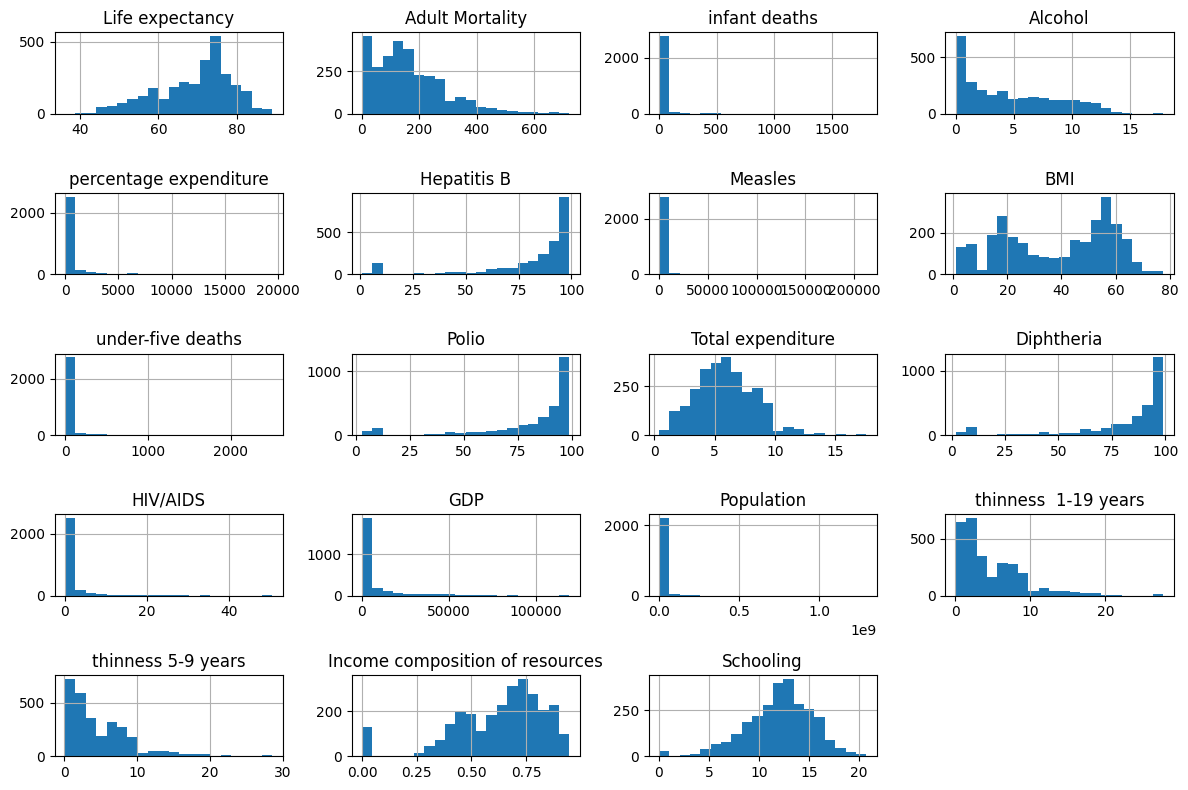

In [54]:
num_cols = ['Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

fig, ax = plt.subplots(figsize=(12,8))
data[num_cols].hist(ax=ax, bins=20)
ax.set_title('Histograms of Numerical Columns', fontsize=16)
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

In [55]:
for col in num_cols:
    
    median = data[col].median()
    data[col].fillna(median, inplace=True)

# решил заменить пропущенные значения медианой, потому что, когда я удалил вс пропущенные, 
# сильно изменилась общая картина данных (график ожидаемой жизни по годам)

/tmp/ipykernel_61984/1175170477.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median, inplace=True)


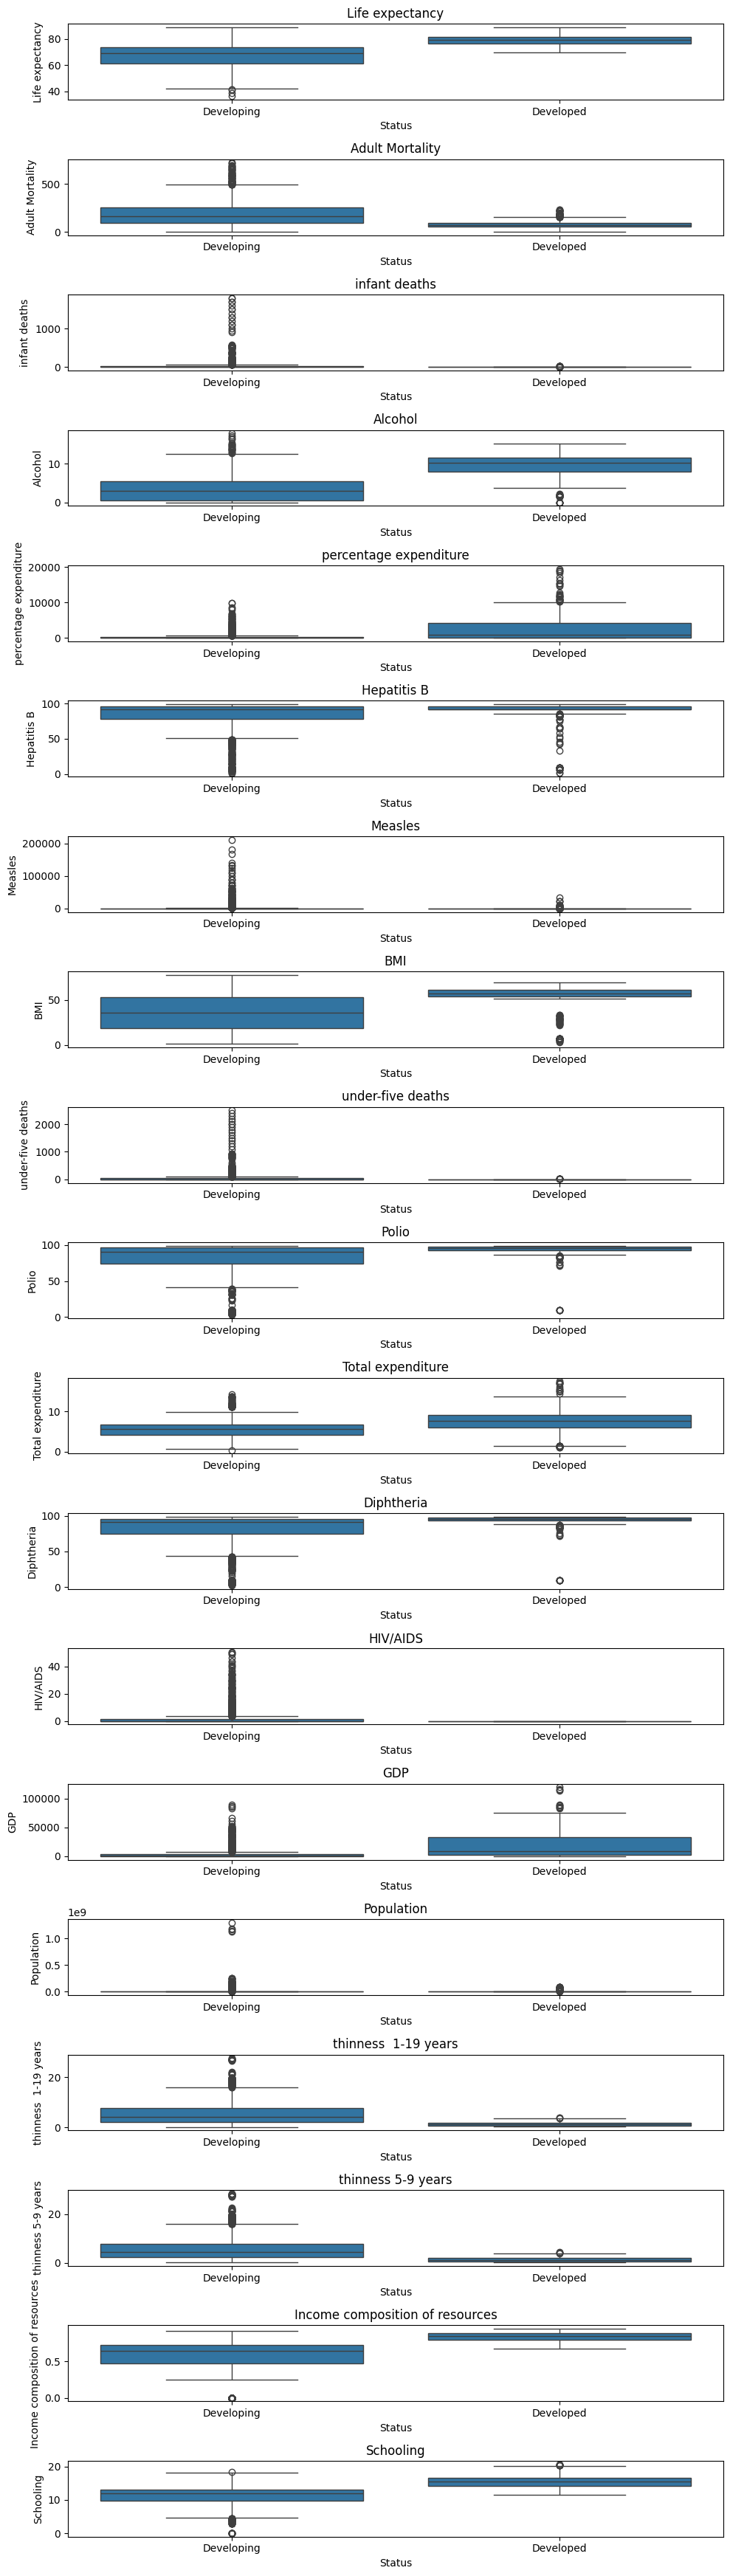

In [56]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 35))

for i, col in enumerate(num_cols):
    sns.boxplot(x="Status", y=col, data=data, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# От выбросов избавляться не буду

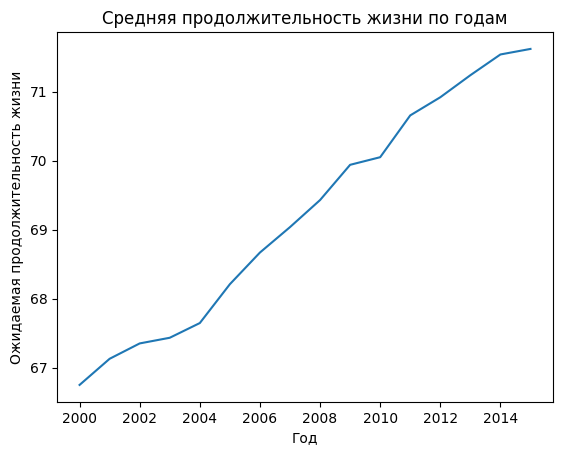

In [57]:
grouped_data = data.groupby('Year')['Life expectancy'].mean()

plt.plot(grouped_data.index, grouped_data.values)

plt.title('Средняя продолжительность жизни по годам')
plt.xlabel('Год')
plt.ylabel('Ожидаемая продолжительность жизни')

plt.show()

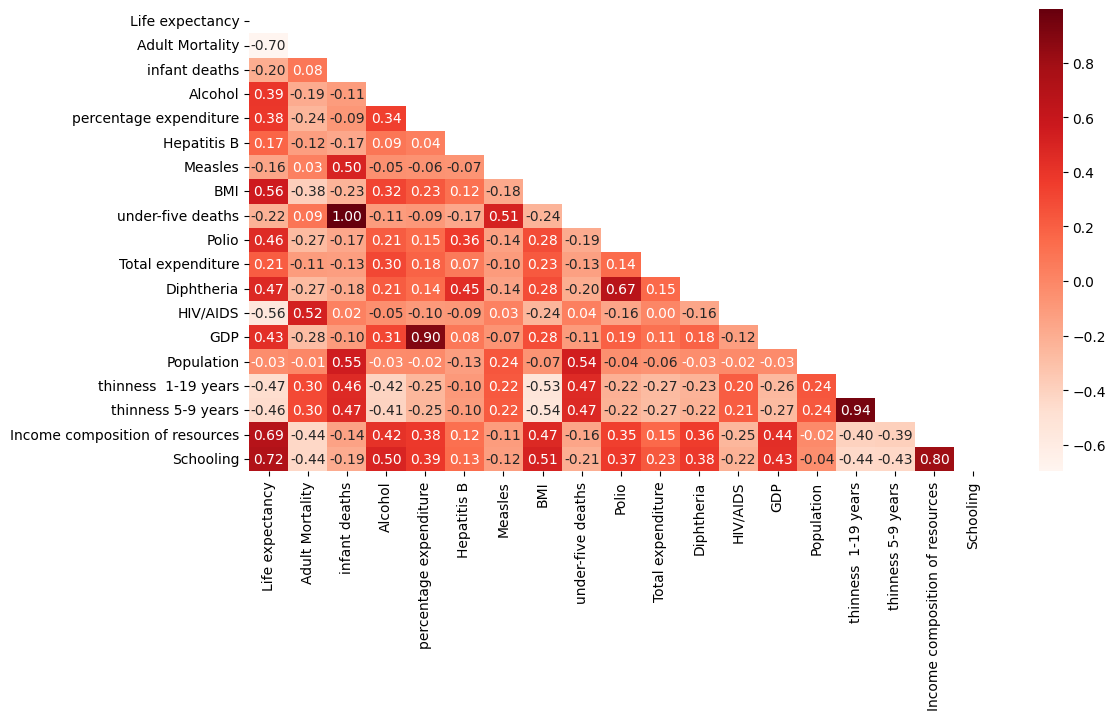

In [58]:
corr = data[num_cols].corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))

sns.heatmap(corr, annot=True,mask=mask, cmap='Reds', fmt='.2f')

plt.show()

Найдите что из этого **фичи**, что из этого **таргет** и положите соответствующие данные в X (фичи) и y (таргетная переменная).

In [59]:
# X = # YOUR CODE HERE
# y = # YOUR CODE HERE

# Признаки (фичи)
X = data[['Alcohol', 
          'Hepatitis B', 'BMI', 'Polio', 
          'Diphtheria', 'HIV/AIDS', 'GDP', 
          'Income composition of resources', 'Schooling']]

# Целевая переменная (таргет)
y = data['Life expectancy']

# Не хочу брать Adult Mortality как фичу (Потому что хочется понять, какие прижизненные факторы повлияют, а не само количество смертей???)

После всего этого вам нужно будет разбить датасет на **тренировочную и тестовую выборки**. 

Тестовая выборка понадобится нам для того, чтобы оценить, насколько наша модель переобучилась. Для этого используйте функцию [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Не забудьте установить какое-то значение в `random_seed` для воспроизводимости. И определите соотношение train/test в процентах через параметр `test_size`

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

И вот только теперь **время для стандартизации** ваших данных и вот почему.

Вы уже знаете, что перед тем как положить **ваши данные** в модель их нужно привести к более менее одной и той же шкале, то есть **стандартизовать**. Для этого можно использовать уже наш любимый `StandardScaler`. У него есть `fit`, и есть `transform`. Но его **нельзя использовать на всём** нашем датасете!

Дело в том, что при работе с моделями машинного обучения мы очень **боимся раньше времени "показать" данные тренировочной выборки** моделе, aka *Data linkage* или утечка данных. Представьте, что у вас есть класс учеников, которые кое-как подглядели ответы на контрольную, а вам нужно оценить **реальные знания**. Но ведь так будет нечестно. Вы потом скажете завучу, что ребята хорошо знают материал, умеют обобщать и справляться с разными вариациями стандартных задач, но ведь это неправда. 

Когда вы фитите скейлер на **всём датасете**, вы вычисляете среднее и дисперсию по **всем-всем данным**, и по трейну и по тесту, а значит неизбежно **даёте моделе подглядеть** ваш тест, который мы так бережно хотим спрятать. Поэтому вот как вам обычно нужно действовать:
* загрузили датасет
* сделали EDA, выбрали фичи и всё такое
* разбили на трейн и тест
* зафитили скейлер **только на трейне**
* трансофрмировали данные трейна
* трансформировали данные теста

Попробуйте ниже!

In [61]:
# scaler = StandardScaler()
# scaler.fit(# YOUR CODE HERE)

# X_train_scaled = # YOUR CODE HERE
# X_test_scaled = # YOUR CODE HERE

In [62]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Создание и сравнение моделей (35 баллов)

Создайте две модели - обычную **линейную регрессию** и **ElasticNet**. 

In [63]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_predict = lr.predict(X_test_scaled)

Проанализируйте значения метрик **MSE, RMSE, MAE, R-squared, adjusted R-squared** для полученных моделей на тренировочном датасете. Сделайте вывод о лучшей модели. 

Залезьте в документацию и обратите внимание на **порядок**, в котором нужно передавать переменные в функции. Есть разница между тем, чтобы первой сообщать настоящие значения y, а потом предсказанные и наоборот.

In [64]:
mse = mean_squared_error(y_test, y_predict)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(mse, rmse, mae, r_squared, adjusted_r2)


19.287665561936237 4.391772485220089 3.3078371380412475 0.7770196666794956 0.7735355989713627


MSE = 19.29, RMSE = 4.39, MAE = 3.31:

Эти метрики показывают, что модель в среднем ошибается на 3.31 - 4.39 единицы. Это хороший результат.

R² = 0.777, Adjusted R² = 0.774:

Модель объясняет около 78% вариации данных, это считается хорошим результатом.

***Получается, что линейная регрессия сработала лучше, чем Elastic Net***

*И не забывайте про вторую модель*

In [65]:
# YOUR CODE HERE

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

y_predict_en = elastic_net.predict(X_test_scaled)

In [66]:
mse = mean_squared_error(y_test, y_predict_en)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_predict_en)
r_squared = r2_score(y_test, y_predict_en)

n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(mse, rmse, mae, r_squared, adjusted_r2)

23.14857065549779 4.811296151298295 3.647300366928423 0.7323846173047197 0.7282031269501059


MSE = 23.15, RMSE = 4.81, MAE = 3.65:

Эти метрики показывают, что модель в среднем ошибается на 3.65–4.81 единицы. Это хороший результат.

R² = 0.733, Adjusted R² = 0.728:

Модель объясняет около 73% вариации данных, это считается хорошим результатом.

Для обеих моделей можно получить **вектор значений весов** при переменных. Эти веса указывают на вклад переменной в регрессию. Какие переменные наиболее важны для предсказания *life expectancy* по мнению обеих моделей?

In [67]:
# print(lr.coef_)
# YOUR CODE HERE

In [68]:
lr_coef = lr.coef_
elastic_net_coef = elastic_net.coef_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression Coefficients': lr_coef,
    'ElasticNet Coefficients': elastic_net_coef
})

coef_df

,Feature,Linear Regression Coefficients,ElasticNet Coefficients
0,Alcohol,0.394542,0.376213
1,Hepatitis B,-0.407040,0.000000
2,BMI,1.374887,1.195793
3,Polio,0.944880,0.761830
4,Diphtheria,1.267479,0.871156
5,HIV/AIDS,-3.589313,-2.258928
6,GDP,0.920842,0.709017
7,Income composition of resources,1.576288,1.593271
8,Schooling,2.688045,1.881792


***Важные признаки:***

Schooling (образование) — сильный положительный вклад в обеих моделях.

Income composition of resources (доход) — также важный положительный признак.

HIV/AIDS — значительный отрицательный вклад.

BMI (индекс массы тела) — важный положительный признак.

Теперь нам нужно **оценить, не переобучаются ли наши модели**. Для этого вспомним о тестовой выборке и получим значения метрик для нее.

In [69]:
# YOUR CODE HERE

**(доп задание: 15 баллов)** А теперь мы предлагаем вам немного поиграть **с соотношением тестовой и тренировочной выборки**. Как мы уже говорили на лекции обычно берётся 80% данных в тест и 20% в трейн. Попробуйте сделать **наоборот** и посмотреть что получится. Не забудьте описать ваши наблюдения.

In [70]:
# YOUR CODE HERE

Напишите нам ваши мысли о том, как вам эта часть домашки. Расскажите, что понравилось больше всего, что меньше. Сколько времени вы на неё потратили и где делали: в пути, дома, на работе, на учёбе.